#    Tiamat-125-HR Initial Data Inspection 
###    10/05/17 
Look at the data for the most massive BHs to get an idea of what variables we have and how to use them.

-PRIMARY CHARACTERISTICS
BlackHoleMass(1e10 solMass)             the black hole mass at the given snapshot
ID(None)                                galaxy ID
Type(None)                              0 means central galaxy, 1 means satellites, 2 means satellites of 1 (2 was 1 
                                        when 1 was 0)
CentralGal(None)                        index of the central galaxy
ColdGas(1e10 solMass)                   cold gas mass at the given snapshot
HotGas(1e10 solMass)                    the hot gas mass at the given snapshot
StellarMass(1e10 solMass)               stellar mass at the given snapshot
DiskScaleLength(Mpc)                    disk scale length at the given snapshot
Pos(Mpc)                                halo position at the given snapshot
Sfr(solMass/yr)                         star formation rate at the given snapshot

-HALO CHARACTERISTICS
Rvir(Mpc)                               virial radius at the given snapshot
Mvir(1e10 solMass)                      virial mass at the given snapshot
Vvir(km/s)                              virial velocity at the given snapshot

-COMPOSITION
H2Mass(1e10 solMass)                    ASK HANK (I guess it's molecular hydrogen mass)
HIMass(1e10 solMass)                    ASK HANK (I guess it's atomic hydrogen mass)
MetalsColdGas(1e10 solMass)             the mass of metal in the cold gas reservoir at the given snapshot
MetalsHotGas(1e10 solMass)              the mass of metal in the hot gas reservoir at the given snapshot
MetalsStellarMass(1e10 solMass)         the mass of metal in the stellar component at the given snapshot

-ADDITIONAL CHARACTERISTICS
BlackHoleAccretedColdMass(1e10 solMass) accreted mass from cold gas reservior to the central massive black hole during
                                        the given snapshot
BlackHoleAccretedHotMass(1e10 solMass)  accreted mass from hot gas reservior to the central massive black hole during 
                                        the given snapshot
MergerBurstMass(1e10 solMass)           stellar mass increased by merger at the given snapshot

dt(Myr)                                 time interval between the previous snapshot when the galaxy can be identified and current snapshot

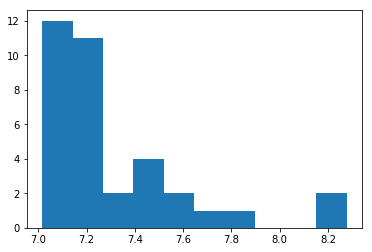

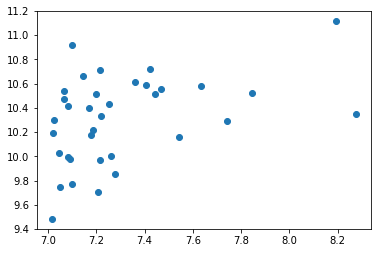

In [23]:
import numpy as np
import matplotlib.pyplot as plt

#Load data
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh_new/Tiamat-125-HR/BlackHoleMass_z5pt84.dat'
BHmass=np.fromfile(fname,dtype=float,count=-1,sep="")

fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh_new/Tiamat-125-HR/StellarMass_z5pt84.dat'
stellarmass=np.fromfile(fname,dtype=float,count=-1,sep="")

#Plot histogram of the log of the BH masses
logmass=np.log10(BHmass*1E10)
plt.hist(logmass)
plt.show()

plt.plot(logmass,np.log10(stellarmass*1E10),'o')
plt.show()



MOST MASSIVE BLACK HOLE
Host has disk radius = 5.0251 kpc and stellar mass = 2.2353e10 Msun
Host is in halo with mass = 1.03295974731e+12
ID = 220003575664.0


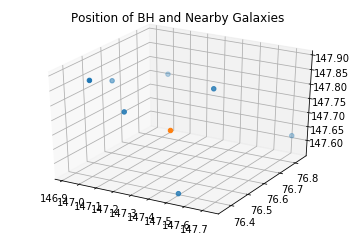

Closest galaxy is at distance 200.904 kpc (Comoving) or 29.332 kpc (Proper)
Closest galaxy has disk radius = 0.6669 kpc and stellar mass = 0.012e10 Msun
Median galaxy disk radius is 0.9269 kpc.
Median galaxy stellar mass is 0.008e10 Msun.


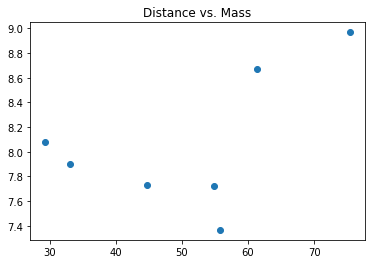

BH-stellar mass ratio: 0.00846628739753


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##Load and store the data for the most massive BH in the data files
#Load data
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh_new/Tiamat-125-HR/BlackHoleMass_z5pt84.dat'
BHmass=np.fromfile(fname,dtype=float,count=-1,sep="")
#Find location of most massive BH in the data files
maxBHloc=np.argmax(BHmass)
#Import the properties of this BH/host into a 1D array called BHproperties
addcolumns=['ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir']
BHproperties=[BHmass[maxBHloc]]

for name in addcolumns: 
    fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh_new/Tiamat-125-HR/'+name+'_z5pt84.dat'
    col=np.fromfile(fname,dtype=float,count=maxBHloc+1,sep="")
    BHproperties.append(col[maxBHloc])
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh_new/Tiamat-125-HR/Pos_z5pt84.dat'
col=np.fromfile(fname,dtype=float,count=-1,sep="")
BHproperties.append(col[3*maxBHloc])
BHproperties.append(col[3*maxBHloc+1])
BHproperties.append(col[3*maxBHloc+2])
BHproperties=np.array(BHproperties)
columns=['BHmass','ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir','XPos','YPos','ZPos']
print('MOST MASSIVE BLACK HOLE')
print('Host has disk radius = '+str(round(3*BHproperties[7]*1000,4))+' kpc and stellar mass = '+str(round(BHproperties[6],4))+'e10 Msun')
print('Host is in halo with mass = '+str(round(BHproperties[-5]*1e10)))
print('ID = '+str(BHproperties[1]))
      
##Load the data of the nearby galaxies into a 2D array called companionProperties
#Find number of nearby galaxies
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/environment/Tiamat-125-HR/'+str(int(BHproperties[1]))+'/ID.dat'
data=np.fromfile(fname,dtype=float,count=-1,sep="")
numNearby=len(data)
#Load in each property one at a time
companionProperties=np.zeros([numNearby,15])
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/environment/Tiamat-125-HR/'+str(int(BHproperties[1]))+'/'+'BlackHoleMass.dat'
companionProperties[:,0]=(np.fromfile(fname,dtype=float,count=-1,sep=""))
i=1
for name in addcolumns: 
    fname='/Users/Maddie/GoogleDrive/PhD/Simulations/environment/Tiamat-125-HR/'+str(int(BHproperties[1]))+'/'+name+'.dat'
    companionProperties[:,i]=(np.fromfile(fname,dtype=float,count=-1,sep=""))
    i=i+1

fname='/Users/Maddie/GoogleDrive/PhD/Simulations/environment/Tiamat-125-HR/'+str(int(BHproperties[1]))+'/Pos.dat'
pos=np.fromfile(fname,dtype=float,count=-1,sep="")
xpos=[]
ypos=[]
zpos=[]
for i in range(0,numNearby):
    xpos.append(pos[3*i])
    ypos.append(pos[3*i+1])
    zpos.append(pos[3*i+2])
xpos=np.array(xpos)
ypos=np.array(ypos)
zpos=np.array(zpos)
companionProperties[:,-3]=xpos
companionProperties[:,-2]=ypos
companionProperties[:,-1]=zpos

##Plot positions of the galaxies & BH in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(companionProperties[:,-1],companionProperties[:,-2],companionProperties[:,-3])
ax.scatter(BHproperties[-1],BHproperties[-2],BHproperties[-3])
plt.title('Position of BH and Nearby Galaxies')
plt.show()

distanceToBH=np.sqrt(np.square(companionProperties[:,-3]-BHproperties[-3])+
    np.square(companionProperties[:,-2]-BHproperties[-2])+
    np.square(companionProperties[:,-1]-BHproperties[-1]))
minloc=np.argmin(distanceToBH)

#print('Properties:',columns)
#print('Closest Gal Properties:',companionProperties[minloc,:])
#print('BHProperties:',BHproperties)


print('Closest galaxy is at distance '+str(round(distanceToBH[minloc]*1000,4))+' kpc (Comoving) or '
+str(round(distanceToBH[minloc]*1000*0.146,4))+' kpc (Proper)')
print('Closest galaxy has disk radius = '+str(np.round(3*companionProperties[minloc,7]*1000,4))+
      ' kpc and stellar mass = '+str(np.round(companionProperties[minloc,6],4))+'e10 Msun')

#print('Properties:',columns[0],columns[4:11])
#print(np.median(companionProperties[:,0]),np.median(companionProperties[:,4:11],axis=0))

print('Median galaxy disk radius is '+str(np.round(np.median(3*companionProperties[:,7]*1000),4))+' kpc.')
print('Median galaxy stellar mass is '+str(np.round(np.median(companionProperties[:,6]),4))+'e10 Msun.')

plt.plot(distanceToBH*0.146*1000,np.log10(companionProperties[:,6]*1e10),'o')
plt.title('Distance vs. Mass')
plt.show()

print('BH-stellar mass ratio: '+str(BHproperties[0]/BHproperties[6]))

SECOND MOST MASSIVE BLACK HOLE
Host has disk radius = 2.3317 kpc and stellar mass = 13.0163e10 Msun
Host is in halo with mass = 3.26152526856e+12
ID = 220003627930.0


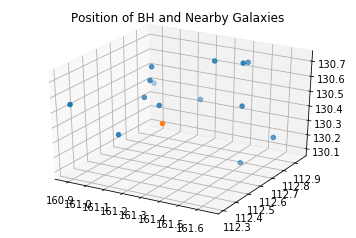

Closest galaxy is at distance 106.5689 kpc (Comoving) or 15.5591 kpc (Proper)
Closest galaxy has disk radius = 1.1718 kpc and stellar mass = 0.1188e10 Msun
Median galaxy disk radius is 1.1516 kpc.
Median galaxy stellar mass is 0.0059e10 Msun.


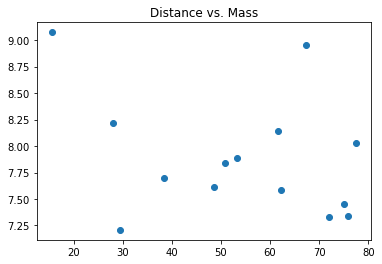

BH-stellar mass ratio: 0.00119806062774


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##Load and store the data for the most massive BH in the data files
#Load data
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh_new/Tiamat-125-HR/BlackHoleMass_z5pt84.dat'
BHmass=np.fromfile(fname,dtype=float,count=-1,sep="")
#Find location of most massive BH in the data files
maxBHloc=np.argsort(BHmass)[-2]
#Import the properties of this BH/host into a 1D array called BHproperties
addcolumns=['ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir']
BHproperties=[BHmass[maxBHloc]]

for name in addcolumns: 
    fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh_new/Tiamat-125-HR/'+name+'_z5pt84.dat'
    col=np.fromfile(fname,dtype=float,count=maxBHloc+1,sep="")
    BHproperties.append(col[maxBHloc])
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh_new/Tiamat-125-HR/Pos_z5pt84.dat'
col=np.fromfile(fname,dtype=float,count=-1,sep="")
BHproperties.append(col[3*maxBHloc])
BHproperties.append(col[3*maxBHloc+1])
BHproperties.append(col[3*maxBHloc+2])
BHproperties=np.array(BHproperties)
columns=['BHmass','ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir','XPos','YPos','ZPos']
print('SECOND MOST MASSIVE BLACK HOLE')
print('Host has disk radius = '+str(round(3*BHproperties[7]*1000,4))+' kpc and stellar mass = '+str(round(BHproperties[6],4))+'e10 Msun')
print('Host is in halo with mass = '+str(round(BHproperties[-5]*1e10)))
print('ID = '+str(BHproperties[1]))
      
##Load the data of the nearby galaxies into a 2D array called companionProperties
#Find number of nearby galaxies
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/environment/Tiamat-125-HR/'+str(int(BHproperties[1]))+'/ID.dat'
data=np.fromfile(fname,dtype=float,count=-1,sep="")
numNearby=len(data)
#Load in each property one at a time
companionProperties=np.zeros([numNearby,15])
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/environment/Tiamat-125-HR/'+str(int(BHproperties[1]))+'/'+'BlackHoleMass.dat'
companionProperties[:,0]=(np.fromfile(fname,dtype=float,count=-1,sep=""))
i=1
for name in addcolumns: 
    fname='/Users/Maddie/GoogleDrive/PhD/Simulations/environment/Tiamat-125-HR/'+str(int(BHproperties[1]))+'/'+name+'.dat'
    companionProperties[:,i]=(np.fromfile(fname,dtype=float,count=-1,sep=""))
    i=i+1

fname='/Users/Maddie/GoogleDrive/PhD/Simulations/environment/Tiamat-125-HR/'+str(int(BHproperties[1]))+'/Pos.dat'
pos=np.fromfile(fname,dtype=float,count=-1,sep="")
xpos=[]
ypos=[]
zpos=[]
for i in range(0,numNearby):
    xpos.append(pos[3*i])
    ypos.append(pos[3*i+1])
    zpos.append(pos[3*i+2])
xpos=np.array(xpos)
ypos=np.array(ypos)
zpos=np.array(zpos)
companionProperties[:,-3]=xpos
companionProperties[:,-2]=ypos
companionProperties[:,-1]=zpos

##Plot positions of the galaxies & BH in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(companionProperties[:,-1],companionProperties[:,-2],companionProperties[:,-3])
ax.scatter(BHproperties[-1],BHproperties[-2],BHproperties[-3])
plt.title('Position of BH and Nearby Galaxies')
plt.show()

distanceToBH=np.sqrt(np.square(companionProperties[:,-3]-BHproperties[-3])+
    np.square(companionProperties[:,-2]-BHproperties[-2])+
    np.square(companionProperties[:,-1]-BHproperties[-1]))
minloc=np.argmin(distanceToBH)

#print('Properties:',columns)
#print('Properties:',companionProperties[0,:])
#print('BHProperties:',BHproperties)

print('Closest galaxy is at distance '+str(round(distanceToBH[minloc]*1000,4))+' kpc (Comoving) or '
+str(round(distanceToBH[minloc]*1000*0.146,4))+' kpc (Proper)')
print('Closest galaxy has disk radius = '+str(np.round(3*companionProperties[minloc,7]*1000,4))+
      ' kpc and stellar mass = '+str(np.round(companionProperties[minloc,6],4))+'e10 Msun')

#print('Properties:',columns[0],columns[4:11])
#print(np.median(companionProperties[:,0]),np.median(companionProperties[:,4:11],axis=0))

print('Median galaxy disk radius is '+str(np.round(np.median(3*companionProperties[:,7]*1000),4))+' kpc.')
print('Median galaxy stellar mass is '+str(np.round(np.median(companionProperties[:,6]),4))+'e10 Msun.')

plt.plot(distanceToBH*0.146*1000,np.log10(companionProperties[:,6]*1e10),'o')
plt.title('Distance vs. Mass')
plt.show()

print('BH-stellar mass ratio: '+str(BHproperties[0]/BHproperties[6]))


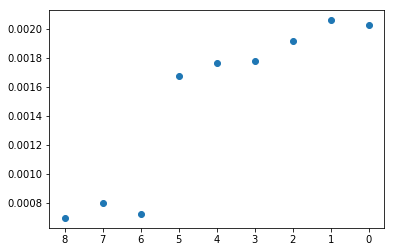

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##Load and store the data for the most massive BH in the data files
addcolumns=['ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir']
columns=['BHmass','ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir','XPos','YPos','ZPos']

BHproperties_all=np.zeros((15,9))
i=0
for redshift in ['5pt59','5pt64','5pt69','5pt74','5pt79','5pt84','5pt90','5pt95','6pt01']:
    #Load data
    fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh/Tiamat-125-HR/BlackHoleMass_z'+redshift+'.dat'
    BHmass=np.fromfile(fname,dtype=float,count=-1,sep="")
    #Find location of most massive BH in the data files
    maxBHloc=np.argmax(BHmass)
    #Import the properties of this BH/host into a 1D array called BHproperties
    BHproperties=[BHmass[maxBHloc]]
    for name in addcolumns: 
        fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh/Tiamat-125-HR/'+name+'_z'+redshift+'.dat'
        col=np.fromfile(fname,dtype=float,count=maxBHloc+1,sep="")
        BHproperties.append(col[maxBHloc])
    fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh/Tiamat-125-HR/Pos_z'+redshift+'.dat'
    col=np.fromfile(fname,dtype=float,count=-1,sep="")
    BHproperties.append(col[3*maxBHloc])
    BHproperties.append(col[3*maxBHloc+1])
    BHproperties.append(col[3*maxBHloc+2])
    BHproperties=np.array(BHproperties)
    BHproperties_all[:,i]=BHproperties
    i=i+1
#print(BHproperties_all)

plt.plot(BHproperties_all[7,:],'o')
plt.gca().invert_xaxis()
plt.show()
